# Assignment 2: Trust Rank Assignment


##### Group Members:
1. Kummitha Jhanavi (CS21BTECH11032)
2. Potta Vennela (CS21BTECH11046)
3. Vinjam Aswitha (MA21BTECH11018)
4. Pundi Bindusree (CS21BTECH11048)
5. K Vivek Kumar (CS21BTECH11026)

In [1]:
# Include Necessary Packages
import pandas as pd
import networkx as nx
import numpy as np
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt

In [2]:
# Importing the datasets
payments_df = pd.read_csv('Payments.csv')
bad_senders_df = pd.read_csv('bad_sender.csv')

In [3]:
bad_senders_df

,Bad Sender
0,1303
1,1259
2,1562
3,1147
4,1393
5,1031
6,1210
7,1042
8,1048
9,1256


In [4]:
# Obtaining the graphs
G = nx.DiGraph()
for _, row in payments_df.iterrows():
    sender = row['Sender']
    receiver = row['Receiver']
    value = row['Amount']
    G.add_edge(sender, receiver, weight=value)

In [5]:
# Taking unique of bad_senders only
bad_senders = set(bad_senders_df['Bad Sender'])

In [34]:
# Attaching trust to each nodes
node_trust = {}
for node in G.nodes():
    if node in bad_senders:
        node_trust[node] = 0
    else:
        node_trust[node] = 100

In [35]:
# Normalizing the initial trust
total_trust = sum(node_trust.values())

for node in G.nodes():
    node_trust[node] = node_trust[node] / total_trust

In [36]:
# Top nodes for viewing
num_top_nodes = min(100, len(G.nodes()))

In [37]:
# Sorting the nodes as per the trust
sorted_nodes_by_trust_before = sorted(G.nodes(), key=lambda node: node_trust.get(node), reverse=True)

# Trust score before
trust_scores_before = [node_trust[node] for node in sorted_nodes_by_trust_before[:num_top_nodes]]

In [38]:
# Iteration factors
max_iterations = 100
tolerance = 1e-12
damping_factor = 0.95

In [43]:
# Computing trust ranks iteratively
for _ in range(max_iterations):
    next_node_trust = {}
    for node in G.nodes():
        incoming_trust = 0.0
        for neighbor in G.predecessors(node):
            sum_of_weights = sum(G[neighbor][succ]['weight'] for succ in G.successors(neighbor))
            incoming_trust += (node_trust.get(neighbor) * G[neighbor][node]['weight'])
        next_node_trust[node] = (1 - damping_factor) + damping_factor * incoming_trust
    
    trust_values = np.array(list(next_node_trust.values())).reshape(1, -1)
    next_node_trust_normalized = normalize(trust_values, norm='l1').tolist()[0]
    
    change = max(abs(next_node_trust_normalized[i] - node_trust.get(node)) for i, node in enumerate(G.nodes()))
    if change < tolerance:
        break
    
    node_trust = {node: next_node_trust_normalized[i] for i, node in enumerate(G.nodes())}

In [40]:
# Sorting the nodes as per the trust
sorted_nodes_by_trust = sorted(G.nodes(), key=lambda node: node_trust.get(node), reverse=True)

In [41]:
print(f"Top {num_top_nodes} trustworthy nodes:")
for i in range(num_top_nodes):
    print(f"{sorted_nodes_by_trust[i]} - Trust Score: {node_trust[sorted_nodes_by_trust[i]]}")

Top 100 trustworthy nodes:
1019 - Trust Score: 0.001267694644573824
1626 - Trust Score: 0.00126769285478716
1567 - Trust Score: 0.0012676923736919627
1225 - Trust Score: 0.0012676922425569467
1005 - Trust Score: 0.0012676904313306515
1041 - Trust Score: 0.0012676903196917942
1117 - Trust Score: 0.0012676891072255204
1122 - Trust Score: 0.0012676887210982138
1534 - Trust Score: 0.0012676886943200868
1325 - Trust Score: 0.001267688553089955
1264 - Trust Score: 0.0012676880642986613
1188 - Trust Score: 0.0012676878930877504
1032 - Trust Score: 0.0012676878806314278
1092 - Trust Score: 0.0012676875262954694
1104 - Trust Score: 0.001267686904121547
1054 - Trust Score: 0.0012676864416877119
1247 - Trust Score: 0.0012676862879553365
1131 - Trust Score: 0.0012676861022975676
1331 - Trust Score: 0.001267686077336145
1251 - Trust Score: 0.0012676853122261637
1241 - Trust Score: 0.0012676840362622708
1126 - Trust Score: 0.0012676821628022107
1148 - Trust Score: 0.0012676811981039765
1025 - Trust 

In [42]:
bad_nodes_trust_rank = {}
for node in sorted_nodes_by_trust:
    if node in bad_senders:
        bad_nodes_trust_rank[node] = node_trust.get(node)

print("Trust Ranks of Bad Nodes:")
for node, trust_rank in bad_nodes_trust_rank.items():
    print(f"Node {node}: Trust Rank {trust_rank}")

Trust Ranks of Bad Nodes:
Node 1210: Trust Rank 0.0012675907267351248
Node 1836: Trust Rank 0.0012675763615131483
Node 1147: Trust Rank 0.0012674700876921046
Node 1099: Trust Rank 0.0012674530665942741
Node 1042: Trust Rank 0.0012674297054600227
Node 1007: Trust Rank 0.0012674177333255583
Node 1076: Trust Rank 0.0012674122682333486
Node 1048: Trust Rank 0.0012673202625158712
Node 1034: Trust Rank 0.0012673048178978641
Node 1161: Trust Rank 0.001267183518189121
Node 1489: Trust Rank 0.0012671609025719623
Node 1031: Trust Rank 0.0012669934291320909
Node 1259: Trust Rank 0.0012378788903362446
Node 1393: Trust Rank 0.0012378788903362446
Node 1256: Trust Rank 0.0012378788903362446
Node 1668: Trust Rank 0.0012378788903362446
Node 1944: Trust Rank 0.0012378788903362446
Node 1562: Trust Rank 0.0012378788903362446
Node 1821: Trust Rank 0.0012378788903362446
Node 1303: Trust Rank 0.0012378788903362446


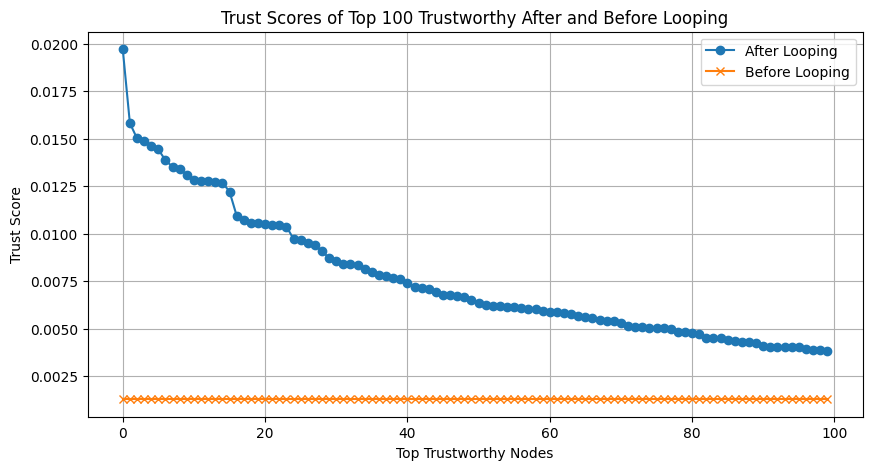

In [19]:
trust_scores_after = [node_trust[node] for node in sorted_nodes_by_trust[:num_top_nodes]]

plt.figure(figsize=(10, 5))
plt.plot(range(num_top_nodes), trust_scores_after, label='After Looping', marker='o')
plt.plot(range(num_top_nodes), trust_scores_before, label='Before Looping', marker='x')

    
plt.xlabel('Top Trustworthy Nodes')
plt.ylabel('Trust Score')
plt.title(f'Trust Scores of Top {num_top_nodes} Trustworthy After and Before Looping')
plt.legend()
plt.grid(True)
plt.savefig("a2r2.png")
plt.show()

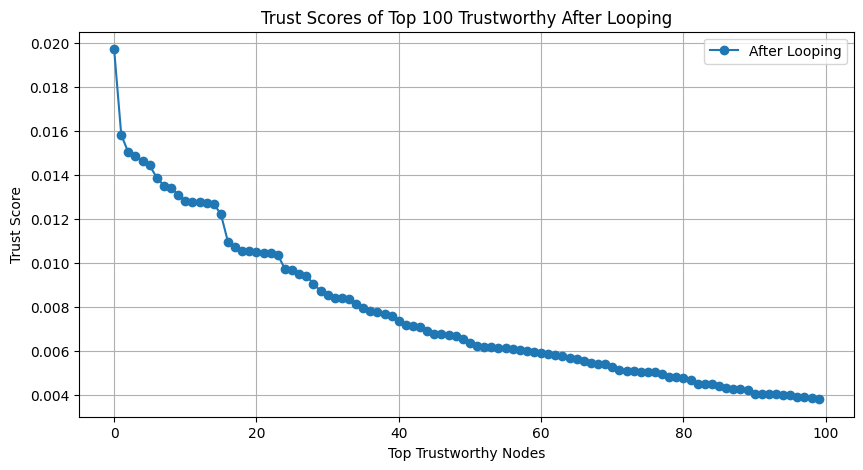

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(range(num_top_nodes), trust_scores_after, label='After Looping', marker='o')

    
plt.xlabel('Top Trustworthy Nodes')
plt.ylabel('Trust Score')
plt.title(f'Trust Scores of Top {num_top_nodes} Trustworthy After Looping')
plt.legend()
plt.grid(True)
plt.savefig("a2r1.png")
plt.show()